In [5]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [9]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
rf_model = RandomForestRegressor(random_state = 42)

In [19]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

# Predict

In [31]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [39]:
y_pred = rf_model.predict(X_test)

In [41]:
np.sqrt(mean_squared_error(y_test,y_pred))

344.8191624908484

# Model Tuning

In [52]:
rf_params = {"max_depth": list(range(1,10)),
             "max_features": [2,3,5,10],
            "n_estimators" : [200,500,1000,2000]}

In [54]:
rf_model = RandomForestRegressor(random_state = 42)

In [56]:
rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv = 10,
                           n_jobs = -1)

In [58]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [2, 3, 5, 10],
                         'n_estimators': [200, 500, 1000, 2000]})

In [60]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 2, 'n_estimators': 200}

In [64]:
rf_tuned = RandomForestRegressor(max_depth =  8, max_features =  2, n_estimators =  200)

In [66]:
rf_tuned = rf_tuned.fit(X_train,y_train)

In [70]:
y_pred = rf_tuned.predict(X_test)

In [72]:
np.sqrt(mean_squared_error(y_test,y_pred))

349.5941661173003

In [76]:
Importance = pd.DataFrame({"Importance" : rf_tuned.feature_importances_*100},
                          index = X_train.columns)

Text(0.5, 0, 'Importance')

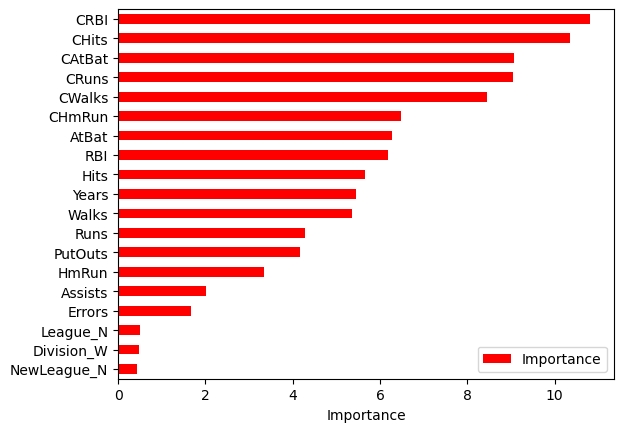

In [80]:
Importance.sort_values( by = "Importance" ,
                       axis = 0,
                       ascending  = True).plot(kind= "barh",
                                               color = "r")
plt.xlabel("Importance")